<!DOCTYPE html>
<html>
    <head>
        <meta charest="UTF-8"> <!--utf-8은 리눅스 불러오는, cp949는 윈도우-->
        <title>HTML 코드 작성해보기</title>
        <br>
    </head>
    <body>
        <a href='https://www.naver.com/'> 네이버
        <br> <!-- 'break'의 약자로 단순히 HTML의 줄 바꿈을 할 때 사용-->
        <a href="https://www.google.com/"> 구글
    </body>

</html>

## Request- 웹 페이지 읽어오기  
- Requests는 파이썬에서 HTTP를 사용하기 위해 쓰여지는 라이브러리입니다.
- 기본 내장 라이브러리는 아니지만, 거의 표준처럼 사용이 되고 있습니다.

- 공식 문서 : https://docs.python-requests.org/en/latest/user/quickstart/
    - GET 방식 : requests.get() - 조회
    - POST 방식 : requests.post() - 생성
    - PUT 방식 : requests.put() - 수정
    - DELETE 방식 : requests.delete() - 삭제
- Get과 Post의 차이점 :   
https://velog.io/@songyouhyun/Get%EA%B3%BC-Post%EC%9D%98-%EC%B0%A8%EC%9D%B4%EB%A5%BC-%EC%95%84%EC%8B%9C%EB%82%98%EC%9A%94  


In [1]:
import requests as re
res=re.get('https://learning.suwon.go.kr/lmth/01_lecture01.asp/user')
print('응답코드: ', res.status_code)# 200이면 정상

if res.status_code == re.codes.ok:
    print('정상')
else:
    print('문제가 생겼습니다. [에러코드{}]'.format(res.status_code))

응답코드:  200
정상


In [2]:
import requests as re
url='https://learning.suwon.go.kr/lmth/01_lecture01.asp'
res=re.get(url)
print('응답코드:{}'.format(res.status_code))

if res.status_code == re.codes.ok:
    print('정상')
else:
    print('문제가 생겼습니다. [에러코드{}]'.format(res.status_code))

응답코드:200
정상


In [3]:
import requests as re
res=re.get('http://github.com/Youngpyoryu/Hanwha')
print('응답코드: ', res.status_code)# 200이면 정상

#res.raise_for_status() - html이 올바르게 작동하는 것 아니면 에러 발생
if res.status_code == re.codes.ok:
    print('정상')
else:
    print('문제가 생겼습니다. [에러코드{}]'.format(res.status_code))

응답코드:  404
문제가 생겼습니다. [에러코드404]


### 403 에러가 나는 경우   
  
- response 403 에러가 나는 경우 브라우저가 아닌 것(Python)에 대한 접속 차단으로 인한 것이다. 요청할 때, header에 User-Agent또는 Referer를 지정하고 접근하면 해결 가능하다.  

- HTTP 헤더는 클라이언트와 서버가 요청 또는 응답으로 부가적인 정보를 전송할 수 있도록 해줍니다.


In [4]:
# 요청시 헤더정보를 크롬으로 지정 -> 리눅스나 엣지는 대부분 접근 불가능
# 이 헤더로 사이트 접근이 되지 않는다면, 'http header 403 error' 검색해서 헤더 찾아보기
request_headers = {
'User-Agent' : ('Mozilla/5.0 (Windows NT 10.0;Win64; x64)\
AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98\
Safari/537.36'), }

url = "https://search.naver.com/search.naver"
response = re.get(url,headers = request_headers)

print(response)

<Response [200]>


### Pandas 속성 이용하기

Response.status_code: 200


'<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>python - Google Search</title><script nonce="hQR6CAKpVuZiSeRbyuATEw">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};var
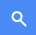
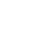
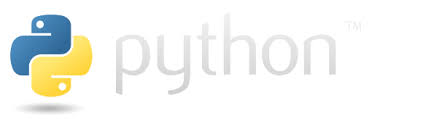
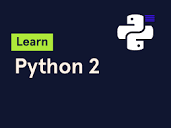
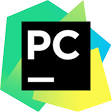
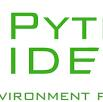

In [5]:
url='http://www.google.com/search'
param={'q':'python'}
Response=re.get(url,params=param)
print('Response.status_code:',Response.status_code)
Response.text

### 파일 생성

일반적으로
-
f = open("foo.txt", 'w')  
f.write("Life is too short, you need python")  
f.close()
-  
파일을 열면(open) 항상 닫아(close) 주어야 한다.     

- With 구문  
with open("foo.txt", "w") as f:  
    f.write("Life is too short, you need python")  
       
**with 블록(with 문에 속해 있는 문장)을 벗어나는 순간, 열린 파일 객체 f가 자동으로 닫힌다.**  

출처: 점프 투 파이썬

In [6]:
res=re.get('https://learning.suwon.go.kr/lmth/01_lecture01.asp')

#res=re.get('http://github.com/Youngpyoryu/Hanwha')

res.raise_for_status()# 쌍으로 가져가는게 좋다, raise: 특정 조건에 한해 오류 발생, 딥러닝에서는 assert를 주로 사용
#assert: 특정 조건이 맞다면 프로그램 돌아가고, 조건이 맞지 않으면 오류 발생

with open('mygoogle.html','w',encoding='utf-8') as f: # Linux encoding : UTF-8 , Window : 'CP949'
    f.write(res.text)
f

<_io.TextIOWrapper name='mygoogle.html' mode='w' encoding='utf-8'>

In [7]:
# 서울시 미세먼지 데이터
res=re.get('http://openapi.seoul.go.kr:8088/6d4d776b466c656533356a4b4b5872/json/RealtimeCityAir/1/99') #json파일로 이루어진
resj=res.json()
print(resj['RealtimeCityAir']['row'][1]['IDEX_NM'])

import pandas as pd
citys=resj['RealtimeCityAir']['row']
citys

MSRDT=[]
권역=[]
구=[]
미세먼지_농도=[]
미세먼지_농도_수치=[]

for city in citys:
    MSRDT.append(city['MSRDT'])
    권역.append(city['MSRRGN_NM'])
    구.append(city['MSRSTE_NM'])
    미세먼지_농도.append(city['IDEX_NM'])
    미세먼지_농도_수치.append(city['IDEX_MVL'])



print(type(MSRDT))

df1=pd.DataFrame({'MSRDT':MSRDT,'권역': 권역,'구': 구,'미세먼지_농도':미세먼지_농도,'미세먼지_농도_수치':미세먼지_농도_수치})

df1.info()



보통
<class 'list'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MSRDT       25 non-null     object 
 1   권역          25 non-null     object 
 2   구           25 non-null     object 
 3   미세먼지_농도     25 non-null     object 
 4   미세먼지_농도_수치  25 non-null     float64
dtypes: float64(1), object(4)
memory usage: 1.1+ KB


In [8]:
# 구글에서는 post가 아닌 get으로 조회만 가능
import requests
URL = "https://google.com/search"
data = {"q":"python"}
Response = re.get(URL, data=data)
print('Response.status_code:', Response.status_code)

Response.status_code: 400


In [9]:
import requests

Response = requests.get('https://google.com')
Response.text

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world\'s information, including webpages, images, videos and more. Google has many special features to help you find exactly what you\'re looking for." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="ywdPGP0BUO06_par8LtXQA">(function(){var _g={kEI:\'xr7ZZJCcJ-mk5NoPiuGBuAI\',kEXPI:\'0,18167,1341242,6058,207,2414,2390,2316,383,246,5,1129120,1760,1196004,303198,77529,16111,28687,22431,1361,12313,17586,4998,17075,38444,2872,2891,3926,7828,606,30668,30022,15324,781,1244,1,16916,2652,4,3832,29062,13065,13658,2980,1457,22616,6621,7596,1,11942,30212,2,16395,342,23023,5680,1021,31121,4569,6258,23418,1249,5838,19300,7484,445,2,2,1,10957,15675,8155,7381,2,3,15964,874,9625,10008,8,192

In [10]:
print('Response.requests.path_url', Response.request.path_url)
print('Response.requests.method', Response.request.method)
print('Response.requests.headers', Response.request.headers)

Response.requests.path_url /
Response.requests.method GET
Response.requests.headers {'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [11]:
#encoding 정보 확인
print('Response.encoding', Response.encoding)

Response.encoding ISO-8859-1


## Beautifulsoup  
: HTML정보로 부터 원하는 데이터를 가져오기 쉽게, 비슷한 분류의 데이터별로 나누어주는(parsing) 파이썬 라이브러리 - 정적 크롤링만 가능


In [20]:
import requests as re
from bs4 import BeautifulSoup as bs4

#request를 통해 html을 불러오면 bs4가 html을 짤라서 가져옴
#검색어 설정
query='블랙핑크'
url = f"https://search.naver.com/search.naver?where=view&sm=tab_jum&query={query}"

#Send a GET request to the URL
response= re.get(url,headers=request_headers)

a=[]

if response.status_code ==200:
    # Parse the HTML content using BeautifulSoup
    soup=bs4(response.content, "html.parser")

    # Find all the <a> elements with class "api_txt_lines total_tit", 제목만 불러오기
    title_elements=soup.find_all('a',class_='api_txt_lines total_tit')

    for title in title_elements:
        text=title.get_text(strip=True) # Use strip=True to remove extra spaces and newlines
        print(text)

else:
    print('Failed to retrieve the web page') # 네이버 정책상 크롤링이 막혔을 경우 출력


블랙핑크리사 루이비통家 남친과 여행 갔나…'럽스타그램' 포착
블랙핑크, 美공연 전석 매진...테일러·비욘세와 어깨 나란히
블랙핑크(지수 제니 리사 로제), 모든 멤버 열애설 휩싸여…인정은 지수만 [종합]
블랙핑크VS 제로베이스원, 최고그룹상 2표차 승부 '활활'
사진이 지나치게 과감하네…블랙핑크리사가 인스타서 공개한 '비키니 뒤태 '
블랙핑크리사♥ '루이비통 2세 남친'과 여행?...'럽스타그램'에 대놓고 올린 사진 리사 열애
블랙핑크지수 인스타그램 팔로워 7500만명 돌파!
요즘 예능 | 할명수 보고 호감도 급상승한블랙핑크지수, 방탄 진, NCT 재현 (BLACKPINK JiSoo...
블랙핑크/ 그냥 보면 기절한다고전해....


In [55]:
# 네이버 검색 API 예제 - 블로그 검색
import os
import sys
import urllib.request
client_id = "VXwVLjacEpWlHQziry0u"
client_secret = "D2z5yQQfd5"
encText = urllib.parse.quote("블랙핑크")
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)


{
	"lastBuildDate":"Mon, 14 Aug 2023 15:44:47 +0900",
	"total":445514,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"스타벅스 신메뉴 <b>블랙핑크<\/b> 스트로베리 초코크림 프라푸치노... ",
			"link":"https:\/\/blog.naver.com\/sht9182\/223173776854",
			"description":"먼저 <b>블랙핑크<\/b>가 적혀있는 하트 초콜릿을 먹어봤습니다. 뒤에 딸기 맛 휘핑크림이 조금 묻어있어서 딸기 맛이 가미된 초콜릿을 먹는 듯한 느낌이었습니다. 아무튼 데커레이션 초코 치고는 맛있었네요. 이... ",
			"bloggername":"프레스티시모",
			"bloggerlink":"blog.naver.com\/sht9182",
			"postdate":"20230803"
		},
		{
			"title":"<b>블랙핑크<\/b> 지수 안보현 공식 열애 인정 프로필 나이 인스타",
			"link":"https:\/\/blog.naver.com\/qkrdmsdhr95\/223173671891",
			"description":"안녕하세요 제이드입니다 :D 처음으로 <b>블랙핑크<\/b> 내에서 공식 열애 인정한 멤버가 있습니다 바로 <b>블랙핑크<\/b> 지수인데요 오늘 디스패치가 발표한 열애설의 주인공은 <b>블랙핑크<\/b> 지수와 배우 안보현입니다 연기... ",
			"bloggername":"By Jade",
			"bloggerlink":"blog.naver.com\/qkrdmsdhr95",
			"postdate":"20230803"
		},
		{
			"title":"<b>블랙핑크<\/b>, 하노이 콘서트 후 베트남 팬들에게 &apos;깜짝선물&apos;",
			"link":"https:\/\/blog.naver.com\/hyungak2\/223179669851",
			"descript

In [151]:
import json

def get_result(client_id,client_secret,query,display=10,start=1,sort='sim'):
    #sort :sim(정확도순으로 내림차순 정렬(기본값)),date(날짜순으로 내림차순 정렬)
    encText = urllib.parse.quote(query)
    url = "https://openapi.naver.com/v1/search/blog?query=" + encText + \
    "&display=" + str(display) + "&start=" + str(start) + "&sort=" + sort

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        response_json = json.loads(response_body)
    else:
        print("Error Code:" + rescode)
    return pd.DataFrame(response_json['items'])

df1=get_result("VXwVLjacEpWlHQziry0u","D2z5yQQfd5",'블랙핑크')


In [138]:
# python) html string 에서 tag 제거하기
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext
 cleanhtml()

In [142]:
# 여러 페이지 웹 크롤링 후 합치기
import pandas as pd
client_id = "wjwEHrhg3I_wLfZ2K5EK"
client_secret = "grrnQywMYC"
query = '경복궁'
display=100
start=1
sort='sim'

result_all=pd.DataFrame()
for i in range(0,2):
    start= 1 + 100*i
    result= get_result(client_id,client_secret,query,display,start,sort)
    result= cleanhtml(result)
    result_all=pd.concat([result_all,result])

TypeError: ignored

In [132]:
result_all.replace('#','',inplace=True)
result_all

,title,link,description,bloggername,bloggerlink,postdate
0,부족함없던 천안 한정식 맛집 <b>경복궁</b>&amp;갓포제주,https://blog.naver.com/judy6670/223168735285,"#천안한정식맛집 #<b>경복궁</b>&amp;갓포제주 얼마 전 엄마 생신에, 천안 ...",♡,blog.naver.com/judy6670,20230728
1,어우러졌던 나들이 <b>경복궁</b> 한복대여,https://blog.naver.com/judeh0809/223155077695,여행 일정 중에 잠시 만나 둘이 같이 <b>경복궁</b> 한복대여를 해서 놀았는데 ...,Sweet Story。,blog.naver.com/judeh0809,20230713
2,취항저격 불당동 소고기 고기집 <b>경복궁</b>갓포제주,https://blog.naver.com/charmshongg/223167088187,<b>경복궁</b> 갓포제주 주소: 충남 아산시 배방읍 희망로46번길 8 2층 전화...,오늘의 참새,blog.naver.com/charmshongg,20230726
3,천안 불당동 고기집 신선한 고기가 독보적인 <b>경복궁</b>갓포제주,https://blog.naver.com/jooinassiya/223161804012,추천받는 <b>경복궁</b> 갓포제주를 알게 되서 방문해봤습니다! 저희 가족 총출동...,Dear My Music,blog.naver.com/jooinassiya,20230720
4,선연한 나들이 <b>경복궁</b> 한복대여,https://blog.naver.com/wjsqhfka73/223171322825,함께 <b>경복궁</b>에서 한복을 입고 산뜻하고 아름다운 선연한 나들이를 다녀왔던...,제주도에서 행복하게 육아하기,blog.naver.com/wjsqhfka73,20230731
...,...,...,...,...,...,...
95,<b>경복궁</b> 창덕궁,https://blog.naver.com/blueberry101/223138396017,고민하다가 <b>경복궁</b> 경회루와 창덕궁 후원 예약을 해서 보기로 결정함 너무...,sentimental,blog.naver.com/blueberry101,20230625
96,"<b>경복궁</b>사진관, 쏘나이스에서 한복 프로필 촬영",https://blog.naver.com/sj1229/223153835970,"<b>경복궁</b>사진관, 쏘나이스에서 한복 프로필 촬영 홍제동사진관 / <b>경복...",여행하는 베리::베리하우스,blog.naver.com/sj1229,20230712
97,"[<b>경복궁</b>/서촌 맛집] 헤르만의 정원, 클래식 밀크티가 맛있는...",https://blog.naver.com/silver_lions/223180236190,화장실 다녀와서 담배 한 대 피우는 도중에 비가 쏟아지기 시작해서 나만 비를 맞았는...,"안녕, 로맨티시즘",blog.naver.com/silver_lions,20230810
98,<b>경복궁</b> 근처 카페. 널담은공간 카페. 편지쓰기체험. 실링왁스...,https://blog.naver.com/neria99/223169308616,<b>경복궁</b> 근처 널담은공간 카페. 국립고궁박물관 오전 관람 후 점심식사 하...,꿈많은 나무늘보 이야기,blog.naver.com/neria99,20230729


## 네이버 날씨 크롤링

In [29]:
import datetime
import urllib
from bs4 import BeautifulSoup
import urllib.request as req

now = datetime.datetime.now() #현재 시간 표시
nowDate = now.strftime('%Y년 %m월 %d일 %H시 %M분 입니다.')

print("\n   Python Weather Crawling 2023 Revise\n ")
print('   Current Datetime, ' + nowDate)
print('   오늘의 날씨 정보입니다.\n')

# 기상청에서 데이터를 가져옵니다.
url = "http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp"
res = req.urlopen(url)
# res = req.urlopen("http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp")
soup = BeautifulSoup(res, "html.parser")
#url을 파이썬이 대신 열어서 해당 html 파일을 파싱 (복사)해옵니다.
title = soup.find("title").string #soup.find는 title값 중 가장 먼저 나온 값을 가져오는
#find_all을 사용하면 title값을 모두 가져와준다.
# html 구문 분석 결과 타이틀을 가져옵니다.
weather_info = soup.find("wf").string
print(title)
print(weather_info.replace('<br />','\n'),sep='\n')
# 좀더 깔끔하게 표현하려면 print 함수내에 내장된 sep 기능과 텍스트 치환기능 을 활용해요
# print(weather_info.replace("<br />","\n "),sep='\n')

import ssl #socket 모듈로 작성한 서버/클라이언트에 공개 키 암호화 방식을 적용할 때 사용하는 모듈이다.
#소켓(Socket)이란 서로 떨어진 두 대의 컴퓨터 사이에서 TCP/IP 네트워크를 통해 상호 통신이 가능하도록 운영체제에서 해당 자원을 할당하고 처리해 주는 방식을 의미

#네이버 날씨 크롤링
# Seoul Weather Crawling
context = ssl._create_unverified_context()
#https에 필요한 ssl 인증 문제에 대한 의존성을 추가하여서, urllib이 성공적으로 https 문서를 열람할 수 있도록 돕습니다.
#클래스 A가 다른 클래스 B를 이용할 때 A가 B에 의존한다고 한다. 이런 관계에서 A는 B없이 작동할 수 없다.
webpage = urllib.request.urlopen('https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8',context=context)
response = requests.get('https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8')
# print(response.raise_for_status()) #None
soup = BeautifulSoup(webpage, 'html.parser')
temps = soup.find('div','temperature_text')
summary = soup.find('div','temperature_info')
region=soup.find('h2','title')
print(region.text.strip()+': '+temps.text.strip())
#print(summary)
print(summary.text.strip())


   Python Weather Crawling 2023 Revise
 
   Current Datetime, 2023년 08월 14일 06시 12분 입니다.
   오늘의 날씨 정보입니다.

기상청 육상 중기예보
○ (강수) 18일(금) 제주도에 비가 오겠습니다.
○ (기온) 이번 예보기간 아침 기온은 22~25도, 낮 기온은 28~33도로 평년(최저기온 20~24도, 최고기온 28~32도)과 비슷하겠습니다.
○ (해상) 17일(목) 동해상에 물결이 1.0~4.0m로 높겠고, 동해안으로 너울이 강하게 밀려오겠습니다.
○ (주말전망) 19일(토)과 20일(일)은 전국이 가끔 구름많겠습니다. 아침 기온은 23~25도, 낮 기온은 30~33도가 되겠습니다.

* 이번 예보기간에는 내륙을 중심으로 소나기가 내릴 가능성이 있겠으니, 앞으로 발표되는 예보와 정보를 참고하기 바랍니다.
중구 을지로1가 현재 온도31.9°
어제보다 1.4° 높아요  흐림    체감 32.5°   습도 61%   서풍 1.9m/s


In [16]:
request_headers = {'User-Agent' : ('Mozilla/5.0 (Windows NT 10.0;Win64; x64)\
AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98\
Safari/537.36'), }

response = requests.get('https://search.naver.com/search.naver?query=강남+날씨',headers= request_headers)
# #위치
# address = soup.find('div', {'class':'title_area _area_panel'}).text
# print(address)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = bs4(response.content, "html.parser")

    # Find all the <a> elements with class "api_txt_lines total_tit"
    title_elements = soup.find_all("a", class_="api_txt_lines total_tit")

    # Extract and print the text content of each title element
    for title_element in title_elements:
        title_text = title_element.get_text(strip=True)  # Use strip=True to remove extra spaces and newlines
        print(title_text)
else:
    print("Failed to retrieve the web page.") #네이버는 정책 상 크롤링이 막혀있음(2023.08.07)



### 주식 상장 목록 받아오기

- 주식 삭장 기업 공식 홈페이지 : https://kind.krx.co.kr/main.do?method=loadInitPage&scrnmode=1

- 주식 상장 기업들의 다양한 정보들을 제공하는 사이트.
- 사이트를 통해 당일 공시, 시장조치, 채권정보 등 다양한 정보를 확인할 수 있습니다.

In [98]:
import pandas as pd
df = pd.read_html('https://kind.krx.co.kr/corpgeneral/corpList.do?method=download')[0]
df

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,AJ네트웍스,95570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BNK금융지주,138930,기타 금융업,금융지주회사,2011-03-30,12월,빈대인,http://www.bnkfg.com,부산광역시
2,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
3,GS,78930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
4,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"최익훈, 정익희, 김회언 (각자 대표이사)",http://www.hdc-dvp.com,서울특별시
...,...,...,...,...,...,...,...,...,...
2622,카이바이오텍,446600,의약품 제조업,방사성 진단 및 치료 의약품,2022-12-23,12월,김영덕,http://www.kaibiotech.com/,전라북도
2623,코스텍시스템,169670,특수 목적용 기계 제조업,"반도체 웨이퍼 이송장비, 본딩장비",2022-01-21,12월,배준호,http://www.kosteks.com/,경기도
2624,타임기술,318660,소프트웨어 개발 및 공급업,"ILS(종합군수지원), IETM(전자식기술교범), CBT(전자식교보재), 기술번역",2021-06-24,12월,주양효,http://timett.co.kr,경상남도
2625,테크엔,308700,전구 및 조명장치 제조업,LED조명장치,2018-12-21,12월,"이지원,박철(각자 대표이사)",http://www.techen.co.kr,대구광역시


In [99]:
df['종목코드']

0        95570
1       138930
2       155660
3        78930
4       294870
         ...  
2622    446600
2623    169670
2624    318660
2625    308700
2626    331660
Name: 종목코드, Length: 2627, dtype: int64

In [100]:
def six_digit(x):
    return "%06d" %x #6자리 문자로 만들어줘라, 만약 6자리가 아니면 앞에 0을 채워줘라

df['종목코드']=df['종목코드'].apply(six_digit)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     2627 non-null   object
 1   종목코드    2627 non-null   object
 2   업종      2627 non-null   object
 3   주요제품    2612 non-null   object
 4   상장일     2627 non-null   object
 5   결산월     2627 non-null   object
 6   대표자명    2627 non-null   object
 7   홈페이지    2450 non-null   object
 8   지역      2627 non-null   object
dtypes: object(9)
memory usage: 184.8+ KB


In [101]:
df = df.sort_values(by = '종목코드')
df.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
1041,동화약품,000020,의약품 제조업,"의약품 제조,판매,수출입",1976-03-24,12월,유준하,http://www.dong-wha.co.kr,서울특별시
1965,KR모터스,000040,그외 기타 운송장비 제조업,"이륜차(오토바이) 제조,도매",1976-05-25,12월,고재철,http://www.krmotors.com,경상남도
1669,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
49,삼양홀딩스,000070,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,"엄태웅, 이영준",http://www.samyang.com,서울특별시
434,하이트진로,000080,알코올음료 제조업,소주,2009-10-19,12월,김인규,http://www.hitejinro.com,서울특별시


### Pandas Profiling
    - EDA를 자동으로 해주는 패키지
    - 패키지가 업그레이드 되면서 문법이 약간 바뀜(https://github.com/ydataai/ydata-profiling)



<img src='https://blog.kakaocdn.net/dn/db3EPf/btreLDyeH8V/GkwvpPo8mxJDWVI5iLnew1/img.png'>

In [128]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 89.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=c05aaf388a5b3f02a0e93379175e554ef9a9a37f0a787df24db85d5ac542adb0
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.1.1:
      Successfully uninstalled pydantic-2.1.1


In [130]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile

Output hidden; open in https://colab.research.google.com to view.